In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import os

from UnzipImage import unzip_img
from ImgToDBZ import RGB_to_DBZ
from RadarBBox import radar_bbox
from RadarDifferences import RadarDifference
from PointOfInterest import POI
from SphericalCoordMath import *
from VectorMath import *

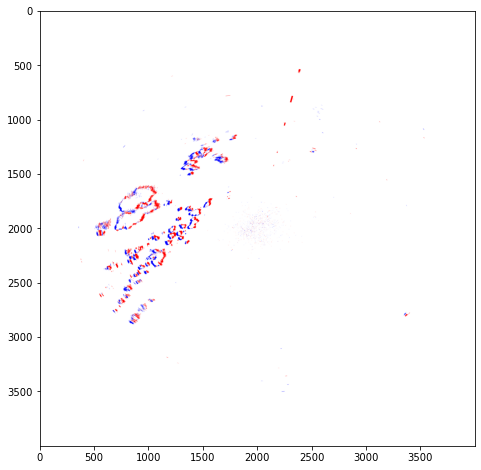

In [2]:
path = './SampleRadarImages/'
filename = os.listdir(path)

# Radar information to be pulled from API call (XComs)
radar_id = filename[0][:4].lower()
radar_type = filename[0][8:-23].lower()

bbox_coords = radar_bbox(radar_id, radar_type) # Geographic information of radar
image_list = [unzip_img(path+file) for file in filename[-2:]] # Only load two most recent images

# Process most recent images
color_proc = RGB_to_DBZ(thres_dbz=15.)
rd = RadarDifference(*image_list, bbox_coords, color_proc)
rd.display_img_diff((8,8))

In [3]:
# Point of Interest - Pull from original function call when pulling radar images
poi_coords = np.array([2000,2000])
poi_loc = POI(poi_coords, bbox_coords, image_list[0].size)

In [4]:
# Bin the radar difference map around the point of interest
bef_bins = poi_loc.bin_image(rd.bef_only_coords, is_norm=True)
aft_bins = poi_loc.bin_image(rd.aft_only_coords, is_norm=True)
net_bins = aft_bins - bef_bins

In [5]:
"""
Dataframe containing the (normalized) binned values for the net motion of precipitating body
Index number -> Angular bin
Column number -> Distance bin
"""
pd.DataFrame(net_bins)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.035714,-0.007772,-0.002999,-0.005308,0.004095,0.000000,0.000000,0.0,0.000000,-0.000383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.022059,-0.016949,-0.008708,-0.007269,-0.001610,-0.001978,0.000000,0.0,0.000000,0.148134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007299,-0.022113,-0.002941,0.002103,0.000000,0.000000,0.000000,0.0,-0.000432,0.043998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.037313,0.002500,0.001504,-0.003229,0.000000,0.000000,0.000000,0.0,0.000000,0.105720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.023810,-0.012953,-0.006173,0.002203,-0.001715,0.000000,0.000000,0.0,0.000000,-0.177778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.007937,-0.007792,0.006202,-0.007752,-0.000864,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.014925,-0.025063,-0.012066,0.004329,0.000000,0.000000,-0.000581,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.007299,-0.002457,0.000000,-0.006329,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.007353,-0.012107,-0.021834,0.005203,0.001614,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
